In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from pylab import rcParams
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import defaultdict
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('dataset_geologist.xlsx',index_col='Unnamed: 0').replace('', 'nan')

In [3]:
dataset.head()

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,6,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,...,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,10,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,...,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,11,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,12,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,...,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,20,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,...,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [4]:
df = dataset.drop(['1. Field name','2. Reservoir unit','7. Latitude', '8. Longitude', 'N'], axis=1)

In [5]:
df.head()

,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
1,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,GUPCO,ONSHORE,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
2,EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,9843,NEOGENE,THINLY-BEDDED SANDSTONE,115.0,66.0,22.0,200.0
3,EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,IEOC,ONSHORE,GAS,DECLINING PRODUCTION,WRENCH,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
4,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,PDO,ONSHORE,OIL,REJUVENATING,SALT,4955,CRETACEOUS,LIMESTONE,250.0,100.0,21.0,60.0


In [6]:
#statistics on Tectonic regime
dataset[['N','6. Tectonic regime']].groupby(by='6. Tectonic regime',dropna=False).count()

,N
6. Tectonic regime,
COMPRESSION,214
EVAPORITE,1
EXTENSION,78
GRAVITY,56
INVERSION,70
STRIKE-SLIP,19
TRANSPRESSION,2
TRANSTENSION,1
UPLIFT,1


In [7]:
#as we can see the same rows have blanks in both Tectonic regime and Porosity 
df_na = dataset[dataset.isnull().any(axis=1)]#rows with blanks
df_na

,N,1. Field name,2. Reservoir unit,3. Country,4. Region,5. Basin name,6. Tectonic regime,7. Latitude,8. Longitude,9. Operator company,...,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
6,22,ALBA,ALBA,UK,EUROPE,NORTH SEA CENTRAL,NaN,58.0692,1.0784,CHEVRON,...,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
7,25,ALBION-SCIPIO,TRENTON-BLACK RIVER,USA,NORTH AMERICA,MICHIGAN,NaN,41.9937,-84.6016,NUMEROUS,...,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
22,54,ARLAN,KASHIRA-PODOL,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,NaN,55.8569,54.3689,BASHNEFT,...,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
26,61,AUGER,S SAND,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,NaN,27.5458,-92.4430,SHELL,...,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
30,67,AWALI,MAUDDUD,BAHRAIN,MIDDLE EAST,THE GULF,NaN,26.0333,50.5333,BAHRAIN NATIONAL OIL CO,...,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1033,YAKELA,KAPSALIANG,CHINA,FAR EAST,TARIM,NaN,41.5539,83.5440,SINOPEC,...,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
500,1047,YOUNG NORTH,BONE SPRING (2ND SANDSTONE),USA,NORTH AMERICA,PERMIAN,NaN,32.7670,-103.7601,NUMEROUS,...,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
503,1053,ZAKUM,THAMAMA ZONE I,UAE,MIDDLE EAST,RUB AL KHALI,NaN,24.8667,53.6833,ADMA /ZADCO,...,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
508,1059,ZAOYUAN,KONGDIAN-1 (ZAONAN BLOCK),CHINA,FAR EAST,BOHAI,NaN,38.2100,117.0600,PETROCHINA,...,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


In [8]:
#devide categorial and numerical parameters
cat_parameters = []
num_parameters = []
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        num_parameters.append(column)
    elif df[column].dtype == object:
        cat_parameters.append(column)

In [9]:
print ('Categorical parameters:', cat_parameters)
print ('Number of categorical parameters:', len(cat_parameters))

Categorical parameters: ['3. Country', '4. Region', '5. Basin name', '6. Tectonic regime', '9. Operator company', '10. Onshore or offshore', '11. Hydrocarbon type (main)', '12. Reservoir status (current)', '13. Structural setting', '15. Reservoir period', '16. Lithology (main)']
Number of categorical parameters: 11


In [10]:
print ('Numerical parameters:', num_parameters)
print ('Number of numerical parameters:', len(num_parameters))

Numerical parameters: ['14. Depth (top reservoir ft TVD)', '17. Thickness (gross average ft)', '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)', '20. Permeability (air average mD)']
Number of numerical parameters: 5


In [11]:
le = LabelEncoder()
for c in cat_parameters:
    df[c] = le.fit_transform(df[c].astype(str))
df

,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,37,5,104,0,152,1,5,8,2,6050,5,9,250.0,184.0,21.0,410.00
1,13,0,0,2,69,1,3,5,6,10282,3,11,745.0,144.0,10.0,8.00
2,13,0,61,5,76,1,2,2,11,9843,7,15,115.0,66.0,22.0,200.00
3,13,0,61,5,76,1,2,2,11,10499,7,11,509.0,410.0,20.0,300.00
4,32,5,28,0,120,1,5,8,7,4955,3,9,250.0,100.0,21.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,9,2,9,2,128,1,5,2,6,4721,9,11,164.0,62.0,23.2,121.00
510,9,2,9,9,128,1,5,7,6,7579,9,11,295.0,79.0,NaN,60.00
511,9,2,9,2,128,1,5,5,6,9843,6,16,492.0,194.0,12.7,3.59
512,36,3,113,0,106,1,5,2,2,1870,2,11,262.0,33.0,24.0,30.00


In [12]:
df_without_blanks = df.dropna()#dataset without blanks

In [13]:
print(len(df_without_blanks.columns))

16


Features correlation

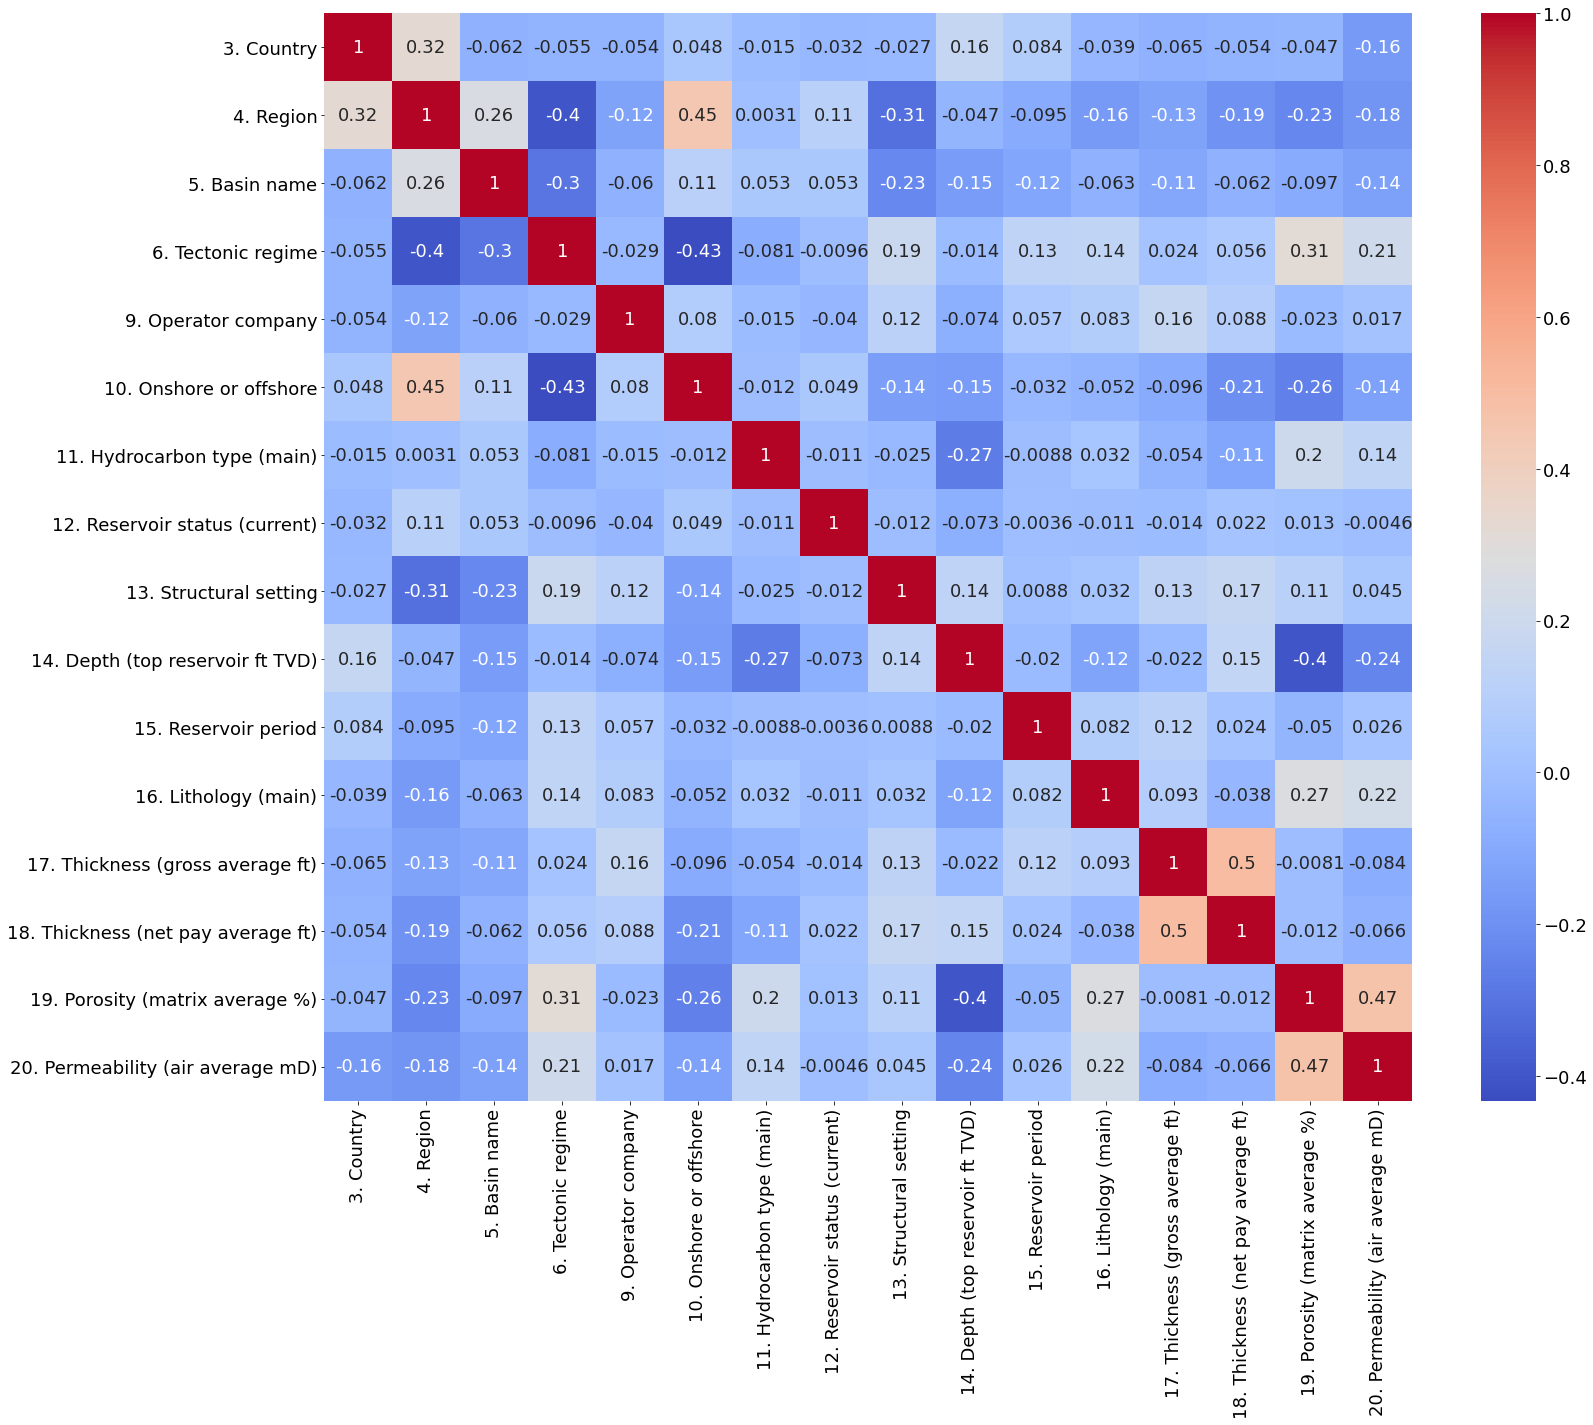

In [14]:
mpl.rcParams['font.size'] = 18.0
sns.heatmap(df_without_blanks.corr(),annot=True, square=True, cmap="coolwarm",
            xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(25,20)

In [15]:
# sns.pairplot(df_without_blanks[cat_parameters], hue='6. Tectonic regime', diag_kind='hist', palette="muted")
# fig=plt.gcf()
# fig.set_size_inches(35,35)

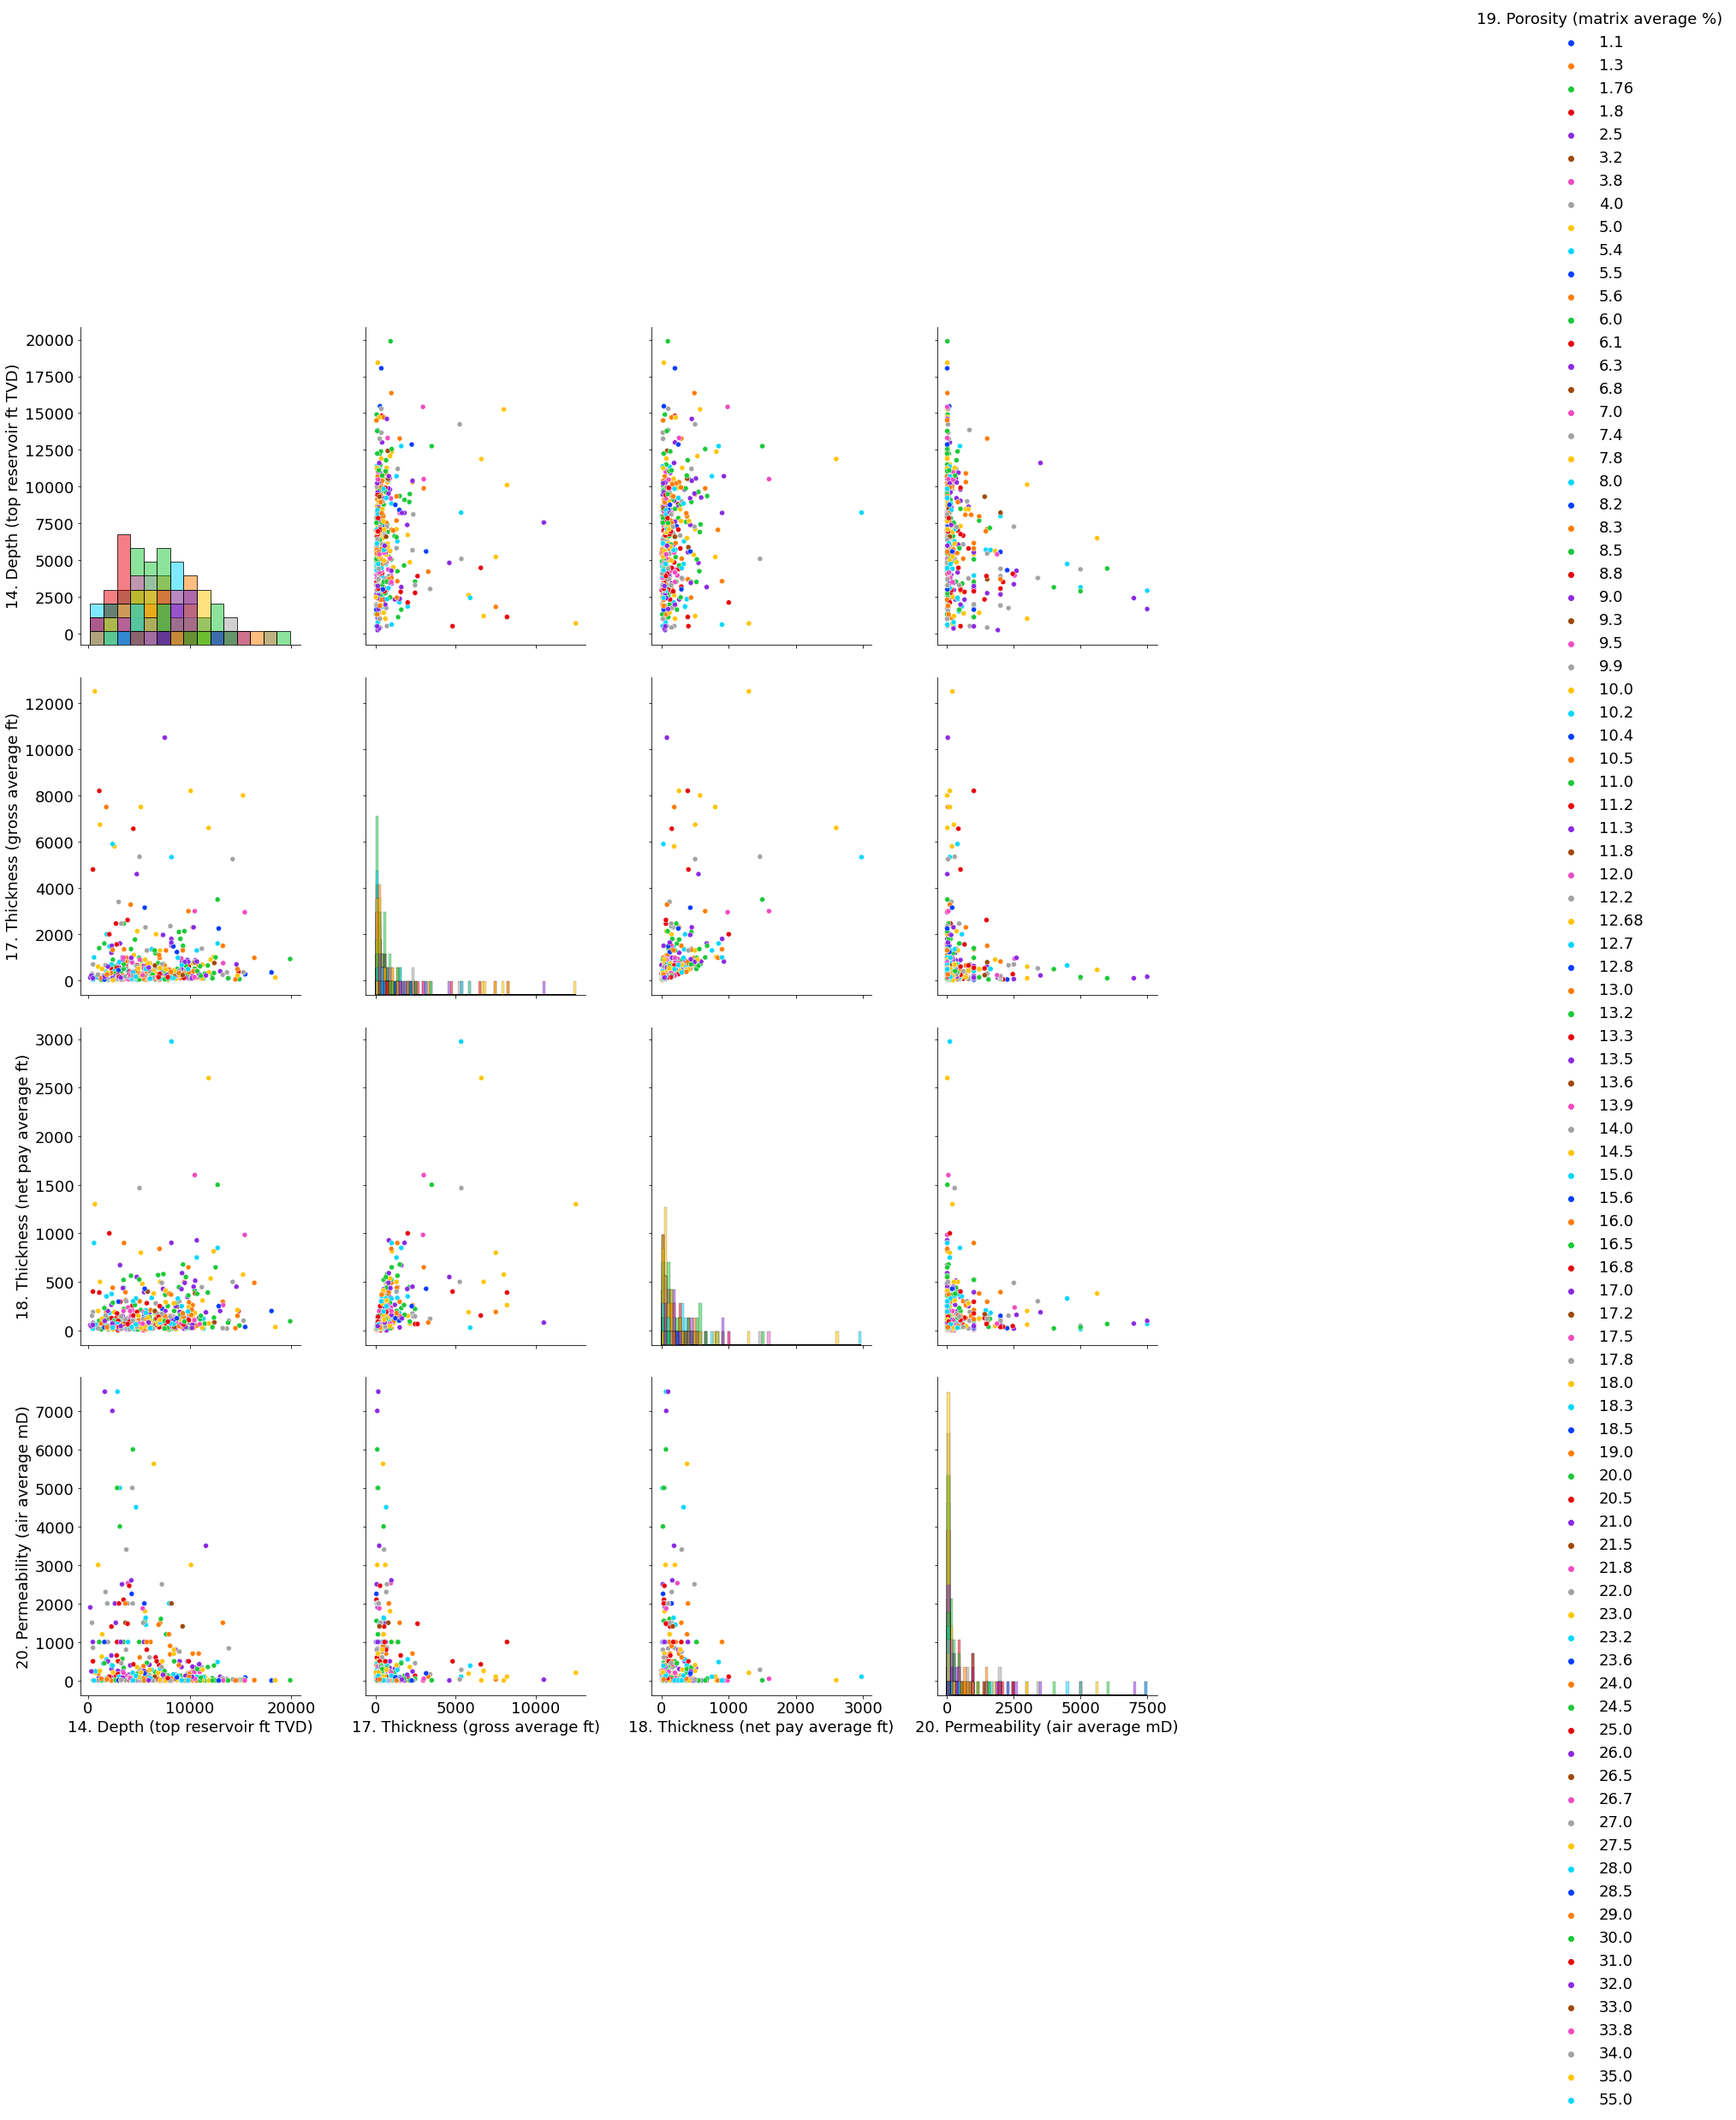

In [16]:
sns.pairplot(df_without_blanks[num_parameters], hue='19. Porosity (matrix average %)',
             diag_kind='hist', palette = "bright")
fig=plt.gcf()
fig.set_size_inches(30,25)


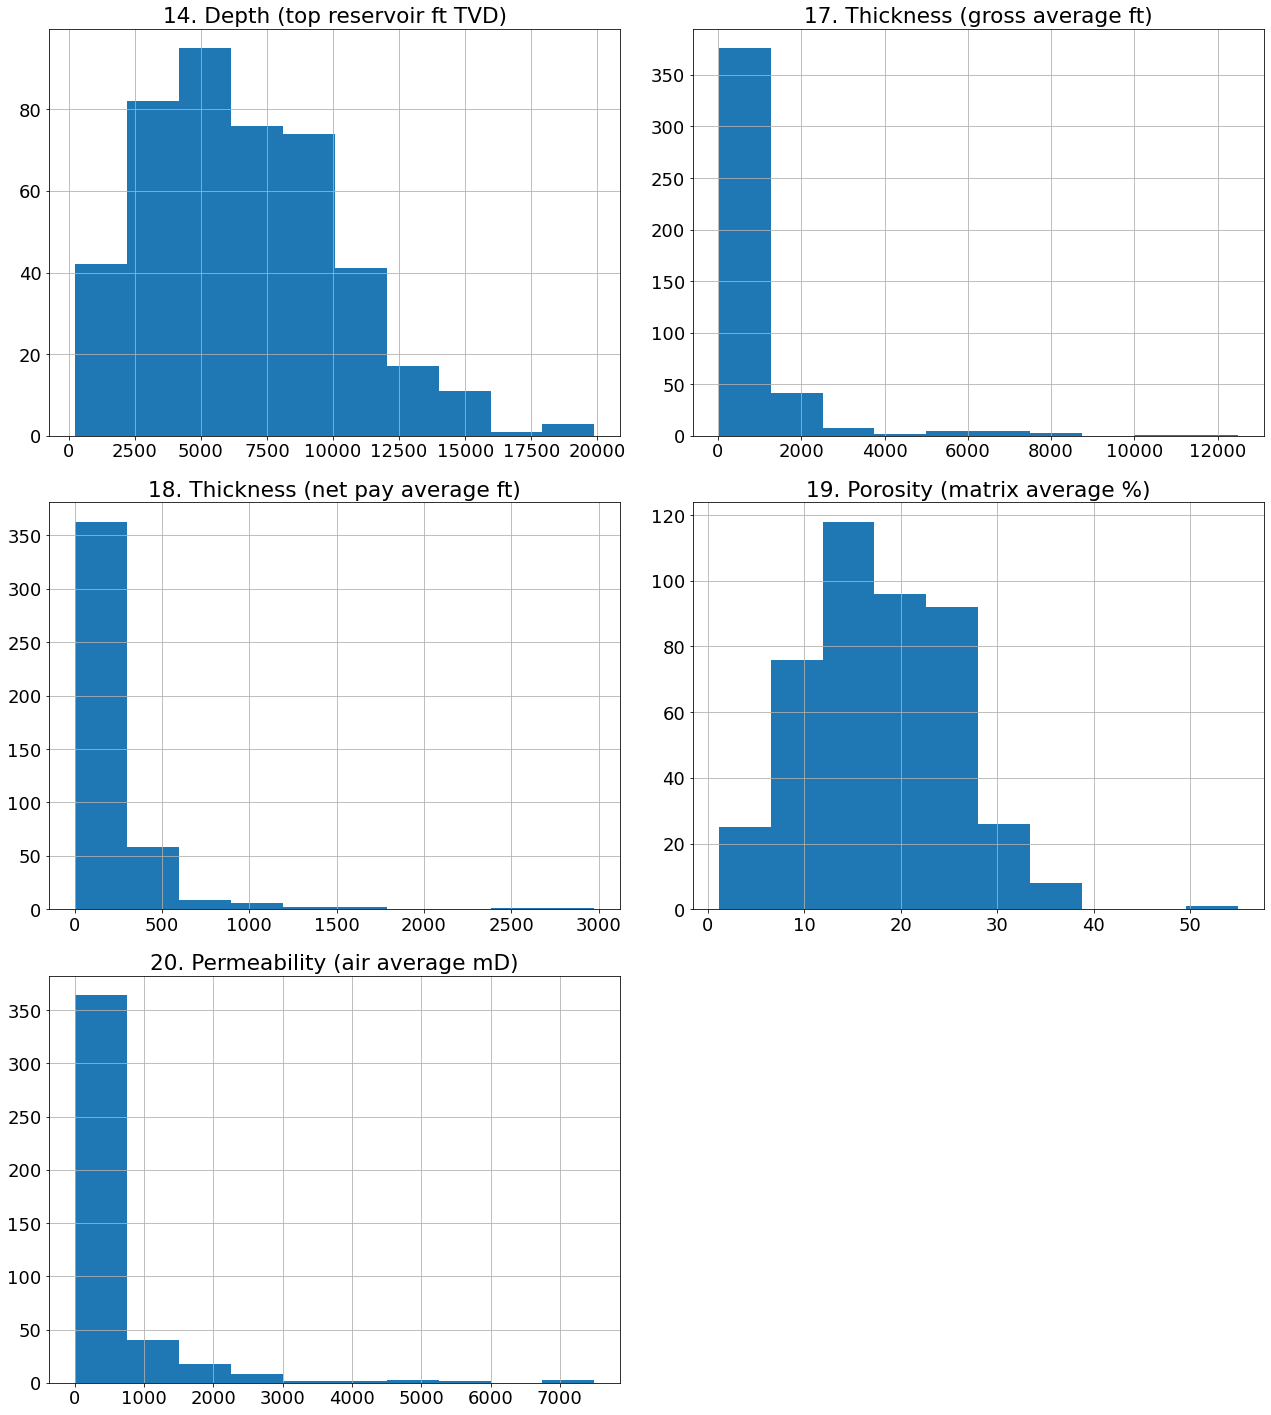

In [17]:
rcParams['figure.figsize'] = 18, 20
df_without_blanks.hist(column = num_parameters)
plt.tight_layout()
plt.show()

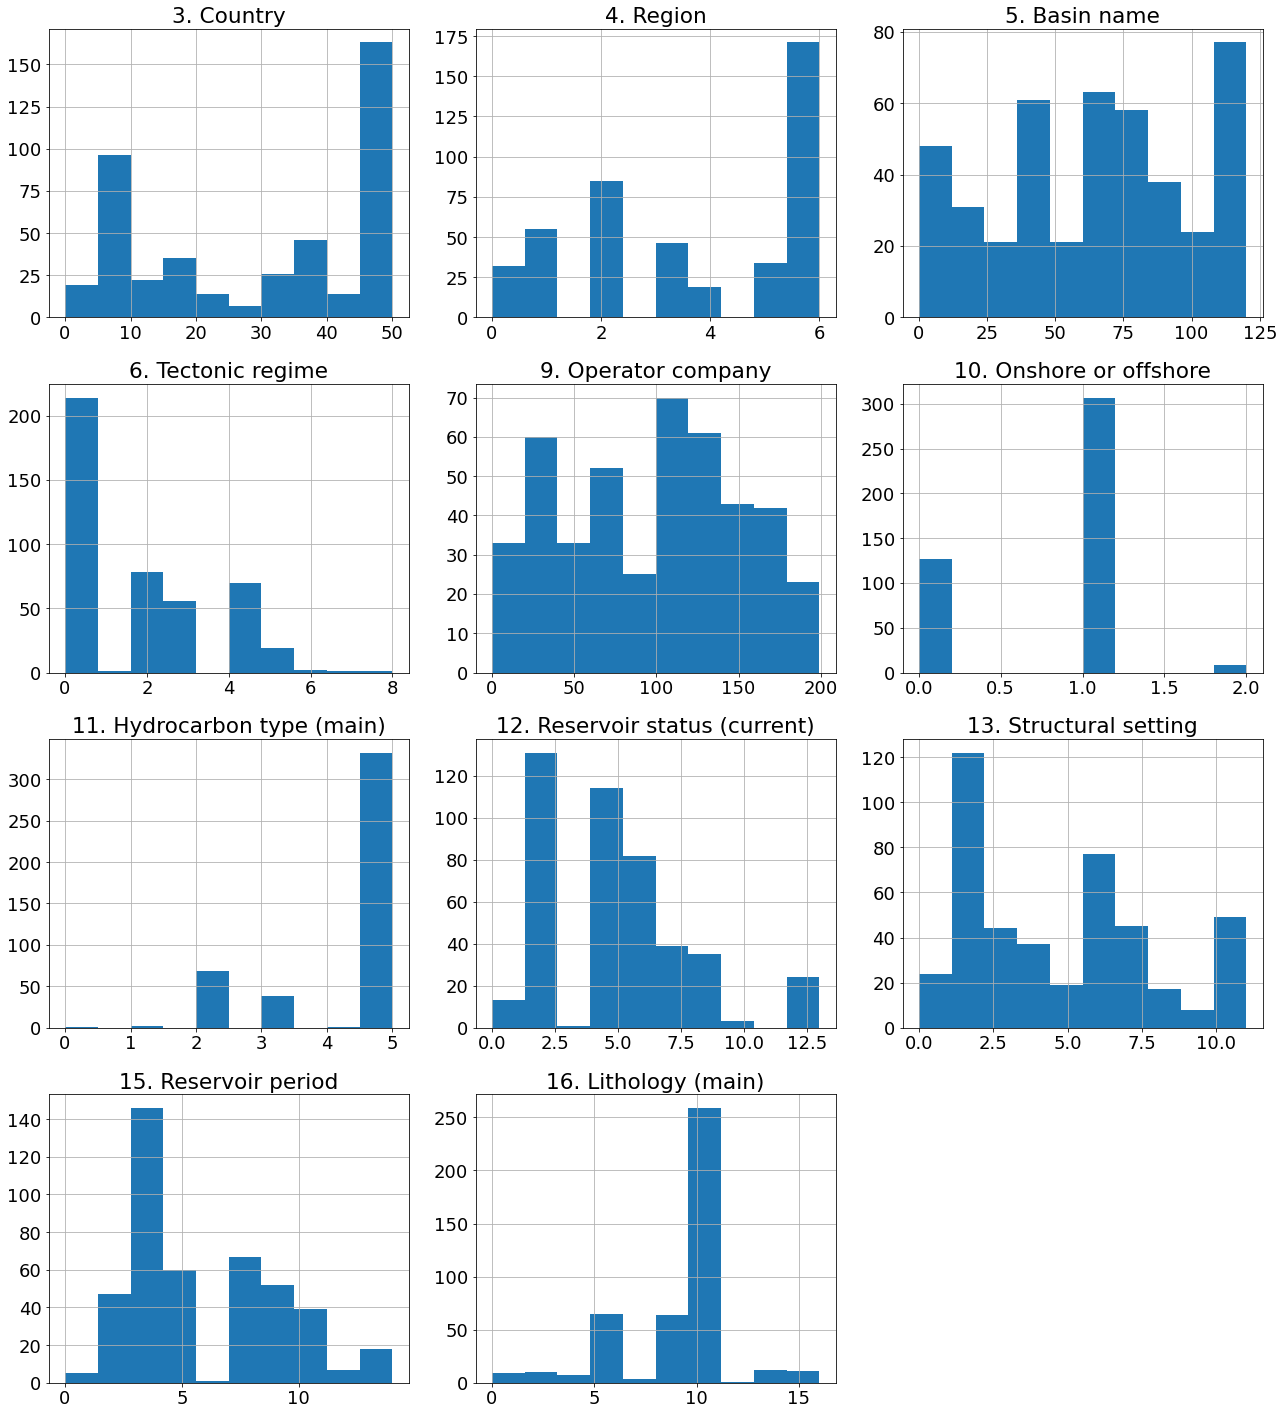

In [18]:
rcParams['figure.figsize'] = 18, 20
df_without_blanks.hist(column = cat_parameters)
plt.tight_layout()
plt.show()

In [19]:
#train-test split to choose a model and the parameters
train, test = train_test_split(df_without_blanks, test_size = 0.2, random_state = 43, shuffle=True) #, shuffle=True

In [20]:
print(train.shape)
print(test.shape)

(353, 16)
(89, 16)


## Models for predicting missing Tectonic regime

In [21]:
# X,y split
y_train = train['6. Tectonic regime']
x_train = train.drop(['6. Tectonic regime'], axis = 1)
y_test = test['6. Tectonic regime']
x_test = test.drop(['6. Tectonic regime'], axis = 1)


In [22]:
#scaler
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)


In [23]:
x_train

,3. Country,4. Region,5. Basin name,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
314,1.097867,1.083378,1.489270,-1.706932,0.583629,0.537577,-0.039593,-0.644660,-0.931773,-1.123107,-0.874178,-0.465843,-0.589933,-1.034480,-0.437458
50,-0.974894,-1.677868,-0.674387,0.547998,-1.436186,0.537577,-1.087805,1.100470,0.136602,0.319603,0.554455,0.335794,1.008883,0.027806,-0.052396
85,-1.271002,1.083378,1.433071,0.252270,0.583629,0.537577,0.309812,-0.993686,0.280748,-0.834565,0.554455,-0.440028,-0.599216,-1.100873,-0.430288
485,-1.211780,-0.757452,-1.545469,0.584964,0.583629,0.537577,-1.087805,0.402418,0.605782,0.896687,0.554455,0.288239,-0.234493,-0.290880,-0.359554
391,-0.678785,-0.757452,-0.477690,-1.152441,-1.436186,0.537577,-0.039593,-1.691738,-0.263332,0.319603,0.554455,-0.207689,-0.052131,1.355663,1.137477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.097867,1.083378,-0.702486,-0.024976,0.583629,0.537577,2.755642,0.751444,1.589083,-0.257481,-0.159861,-0.377527,-0.522956,-0.901694,-0.380871
352,0.387206,-0.297245,1.152077,1.065523,-1.436186,0.537577,2.406237,-0.295634,0.260680,-1.123107,-0.159861,-0.098992,-0.151601,0.160592,-0.323703
297,-1.271002,1.083378,1.489270,-1.632999,0.583629,0.537577,1.358025,-0.644660,-0.623697,-1.123107,-1.231336,-0.503887,-0.542850,0.293377,-0.436586
369,-1.271002,1.083378,1.433071,-0.357670,0.583629,0.537577,0.309812,-0.993686,-0.996780,-0.546023,-0.159861,-0.003883,-0.317384,-1.300051,-0.343082


In [24]:
random_state = 42

In [25]:
def evaluate(y_test, y_pred):
    print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
    print('F1:',metrics.f1_score(y_test, y_pred, average= 'weighted'))

### Random Forests


simple

In [26]:
clf=RandomForestClassifier(n_estimators=78, random_state=random_state)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.8539325842696629
F1: 0.8443938925350839


In [27]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']
features

,name,importance
0,13. Structural setting,0.147148
1,5. Basin name,0.144831
2,4. Region,0.105648
3,10. Onshore or offshore,0.072992
4,3. Country,0.068767
5,20. Permeability (air average mD),0.065538
6,14. Depth (top reservoir ft TVD),0.063708
7,9. Operator company,0.060219
8,19. Porosity (matrix average %),0.056888
9,17. Thickness (gross average ft),0.050960


Text(0.5, 1.0, 'Feature Importance')

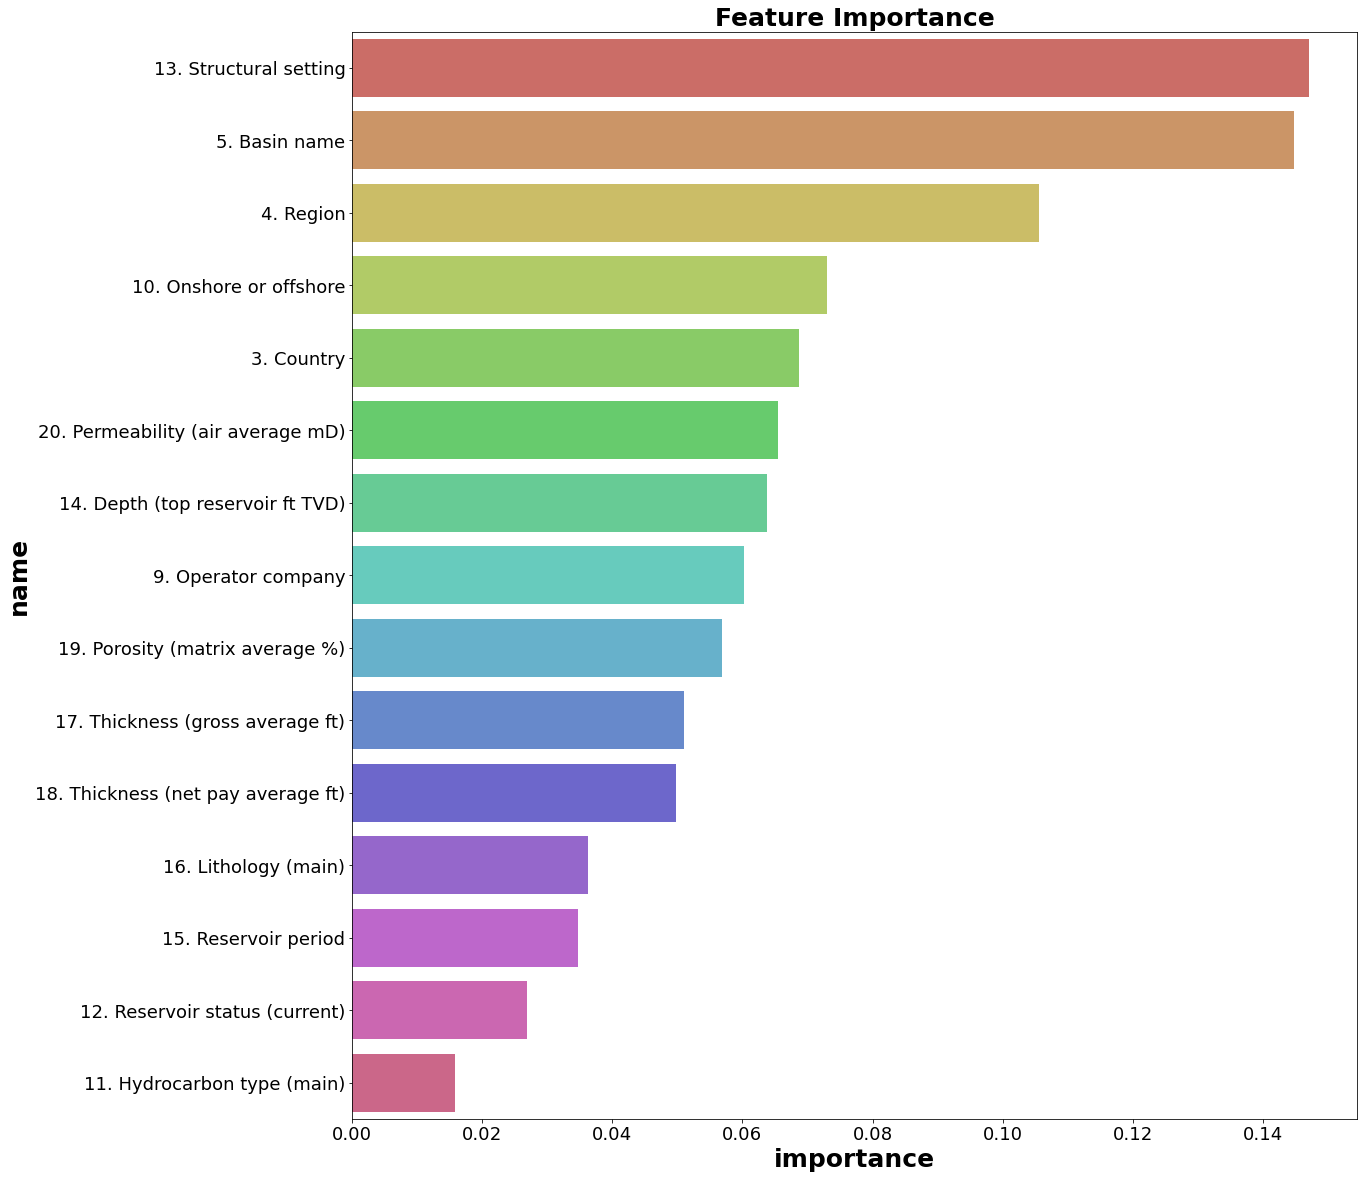

In [28]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

tuned and cv

In [29]:
params = {'n_estimators': np.arange(20, 100, 5),
               'max_depth': [5,12,18,20],
               'min_samples_split': [2, 3, 5],
               'min_samples_leaf': [1, 2, 5]}

clf=RandomForestClassifier(random_state=random_state)

In [30]:
grid_search = GridSearchCV(estimator = clf, param_grid = params, scoring='accuracy', cv = 5, verbose=2, n_jobs = -1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 2764 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 12, 18, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])},
             scoring='accuracy', verbose=2)

In [31]:
grid_search.best_score_

0.8243863179074445

In [32]:
grid_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 55}

In [33]:
best_features_RandomForest = features['name'][:5]

In [34]:
clf_best_RandomForest=RandomForestClassifier(random_state=random_state, n_estimators=55,
                           max_depth=12, min_samples_split=2, min_samples_leaf=1)
clf_best_RandomForest.fit(x_train[best_features_RandomForest], y_train)
y_pred=clf_best_RandomForest.predict(x_test[best_features_RandomForest])
evaluate(y_test, y_pred)

Accuracy: 0.9213483146067416
F1: 0.9191666266370301


In [35]:
res = cross_val_score(clf_best_RandomForest, x_train, y_train, cv=5)
print(res)

[0.8028169  0.83098592 0.83098592 0.81428571 0.84285714]


### Gradient Boosting

In [36]:
clf=GradientBoostingClassifier(random_state=random_state)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
evaluate(y_test, y_pred1)

Accuracy: 0.8651685393258427
F1: 0.8523072869147159


In [37]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']
features

,name,importance
0,13. Structural setting,0.289737
1,10. Onshore or offshore,0.165387
2,4. Region,0.155800
3,5. Basin name,0.124766
4,3. Country,0.078086
5,9. Operator company,0.035756
6,20. Permeability (air average mD),0.033144
7,19. Porosity (matrix average %),0.027250
8,18. Thickness (net pay average ft),0.024447
9,14. Depth (top reservoir ft TVD),0.022077


Text(0.5, 1.0, 'Feature Importance')

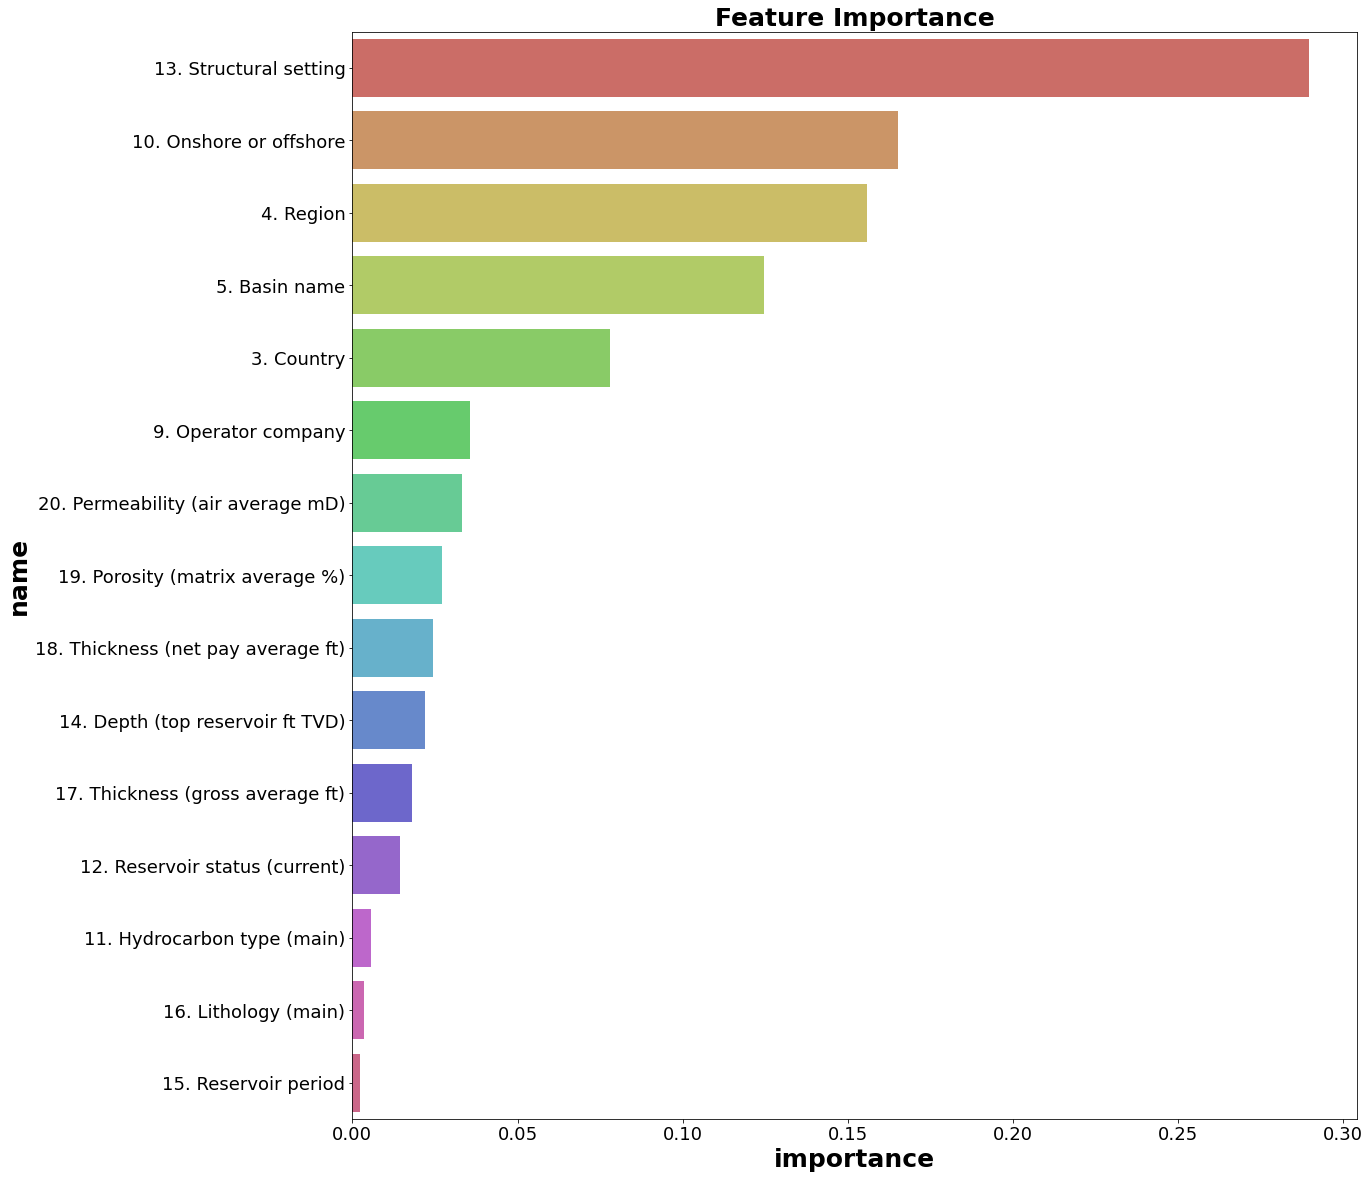

In [38]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [39]:
params = {'n_estimators': np.arange(30, 60, 10),
               'max_depth': [3,5],
               'min_samples_split': [2, 3, 5],
               'min_samples_leaf': [1, 2, 5]
         }

In [40]:
grid_search = GridSearchCV(estimator = clf, param_grid = params, scoring='accuracy', cv = 5, verbose=2, n_jobs = -1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': array([30, 40, 50])},
             scoring='accuracy', verbose=2)

In [41]:
grid_search.best_score_

0.8556539235412475

In [42]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [43]:
best_features_GradientBoosting = features['name'][:5]

In [44]:
clf_best_GradientBoosting=GradientBoostingClassifier(random_state=random_state, max_depth=3, n_estimators=50,
                               min_samples_leaf=1, min_samples_split= 5, subsample=0.9)
clf_best_GradientBoosting.fit(x_train[best_features_GradientBoosting],y_train)
y_pred=clf_best_GradientBoosting.predict(x_test[best_features_GradientBoosting])
evaluate(y_test, y_pred)

Accuracy: 0.9213483146067416
F1: 0.9213890364574251


In [45]:
cross_val_score(clf_best_GradientBoosting, x_train, y_train, cv=6)


array([0.84745763, 0.77966102, 0.83050847, 0.81355932, 0.86440678,
       0.93103448])

### Extra Trees

In [46]:
clf=ExtraTreesClassifier(random_state=random_state)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.8651685393258427
F1: 0.855673315673147


In [47]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']

Text(0.5, 1.0, 'Feature Importance')

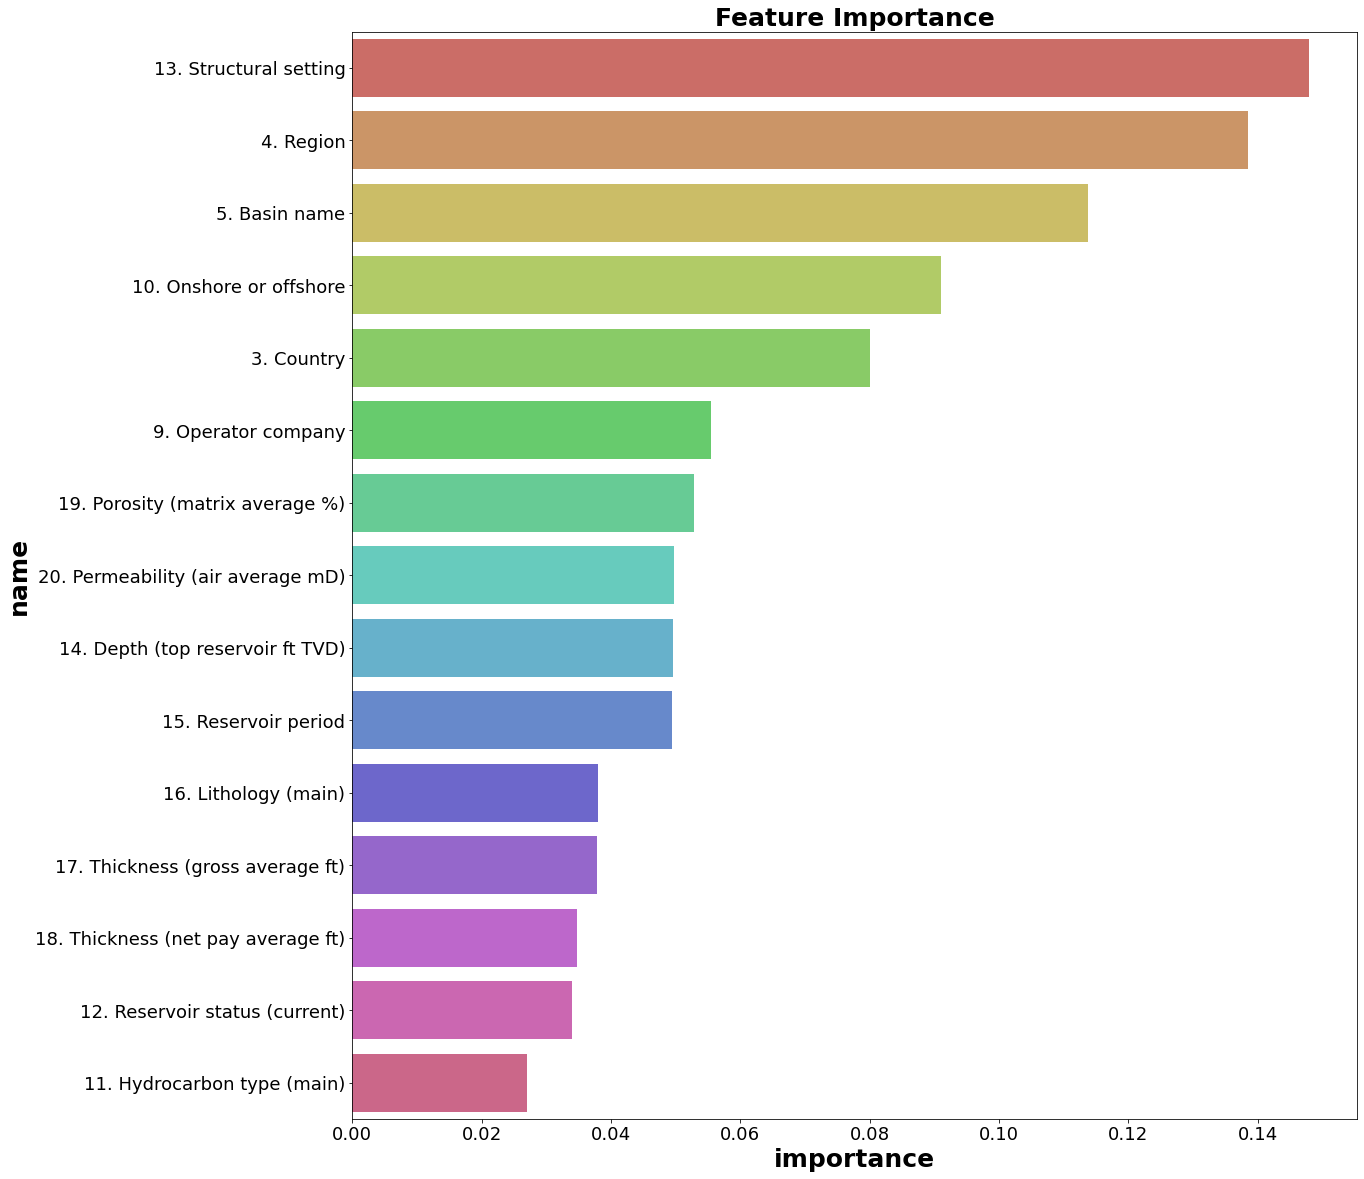

In [48]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [49]:
clf=ExtraTreesClassifier(random_state=random_state)
clf.fit(x_train[features['name'].head(5)],y_train)
y_pred=clf.predict(x_test[features['name'].head(5)])
evaluate(y_test, y_pred)

Accuracy: 0.9213483146067416
F1: 0.9192970700422248


In [50]:
params = {'n_estimators': np.arange(20, 100, 5),
               'max_depth': [5,12,18,20],
               'min_samples_split': [2, 3, 5],
               'min_samples_leaf': [1, 2, 5]}

In [51]:
grid_search = GridSearchCV(estimator = clf, param_grid = params, scoring='accuracy', cv = 5, verbose=2, n_jobs = -1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   45.6s finished


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 12, 18, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])},
             scoring='accuracy', verbose=2)

In [52]:
grid_search.best_score_

0.8386317907444669

In [53]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 65}

In [54]:
best_features_ExtraTrees = features['name'][:5]

In [55]:
clf_best_ExtraTrees=ExtraTreesClassifier(max_depth=20,min_samples_leaf = 1, min_samples_split = 3,
                         n_estimators = 65,random_state=random_state)
clf_best_ExtraTrees.fit(x_train[best_features_ExtraTrees],y_train)
y_pred=clf_best_ExtraTrees.predict(x_test[best_features_ExtraTrees])
evaluate(y_test, y_pred)

Accuracy: 0.9213483146067416
F1: 0.9192970700422248


In [56]:
cross_val_score(clf_best_ExtraTrees, x_train, y_train, cv=6)

array([0.83050847, 0.76271186, 0.88135593, 0.86440678, 0.77966102,
       0.84482759])

### AdaBoost

In [57]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.5730337078651685
F1: 0.4497376345332358


In [58]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']
features

,name,importance
0,9. Operator company,0.50
1,5. Basin name,0.48
2,4. Region,0.02
3,3. Country,0.00
4,10. Onshore or offshore,0.00
5,11. Hydrocarbon type (main),0.00
6,12. Reservoir status (current),0.00
7,13. Structural setting,0.00
8,14. Depth (top reservoir ft TVD),0.00
9,15. Reservoir period,0.00


Text(0.5, 1.0, 'Feature Importance')

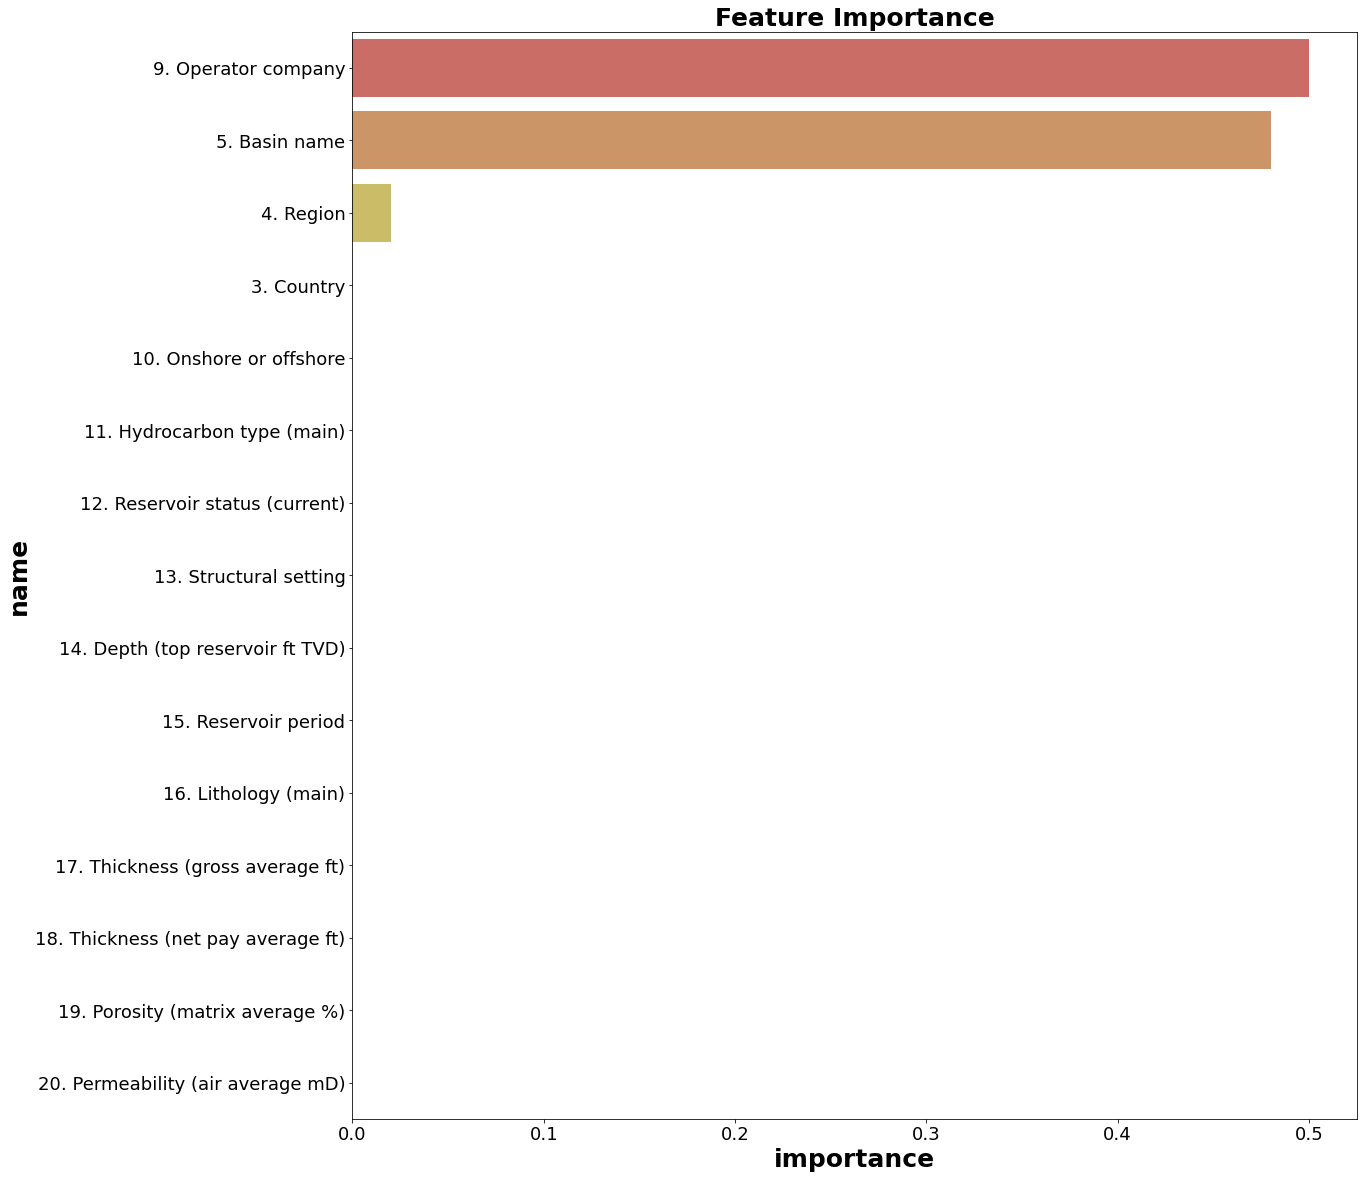

In [59]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [60]:
clf=AdaBoostClassifier()
clf.fit(x_train[features['name'][:3]],y_train)
y_pred=clf.predict(x_test[features['name'][:3]])
evaluate(y_test, y_pred)

Accuracy: 0.5730337078651685
F1: 0.4497376345332358


### XGB

In [61]:
clf=XGBClassifier(random_state=random_state)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.8651685393258427
F1: 0.855673315673147


In [62]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']
features

,name,importance
0,10. Onshore or offshore,0.340013
1,4. Region,0.181098
2,13. Structural setting,0.105300
3,5. Basin name,0.074775
4,3. Country,0.049266
5,20. Permeability (air average mD),0.037139
6,9. Operator company,0.036141
7,16. Lithology (main),0.029809
8,11. Hydrocarbon type (main),0.027099
9,15. Reservoir period,0.025389


Text(0.5, 1.0, 'Feature Importance')

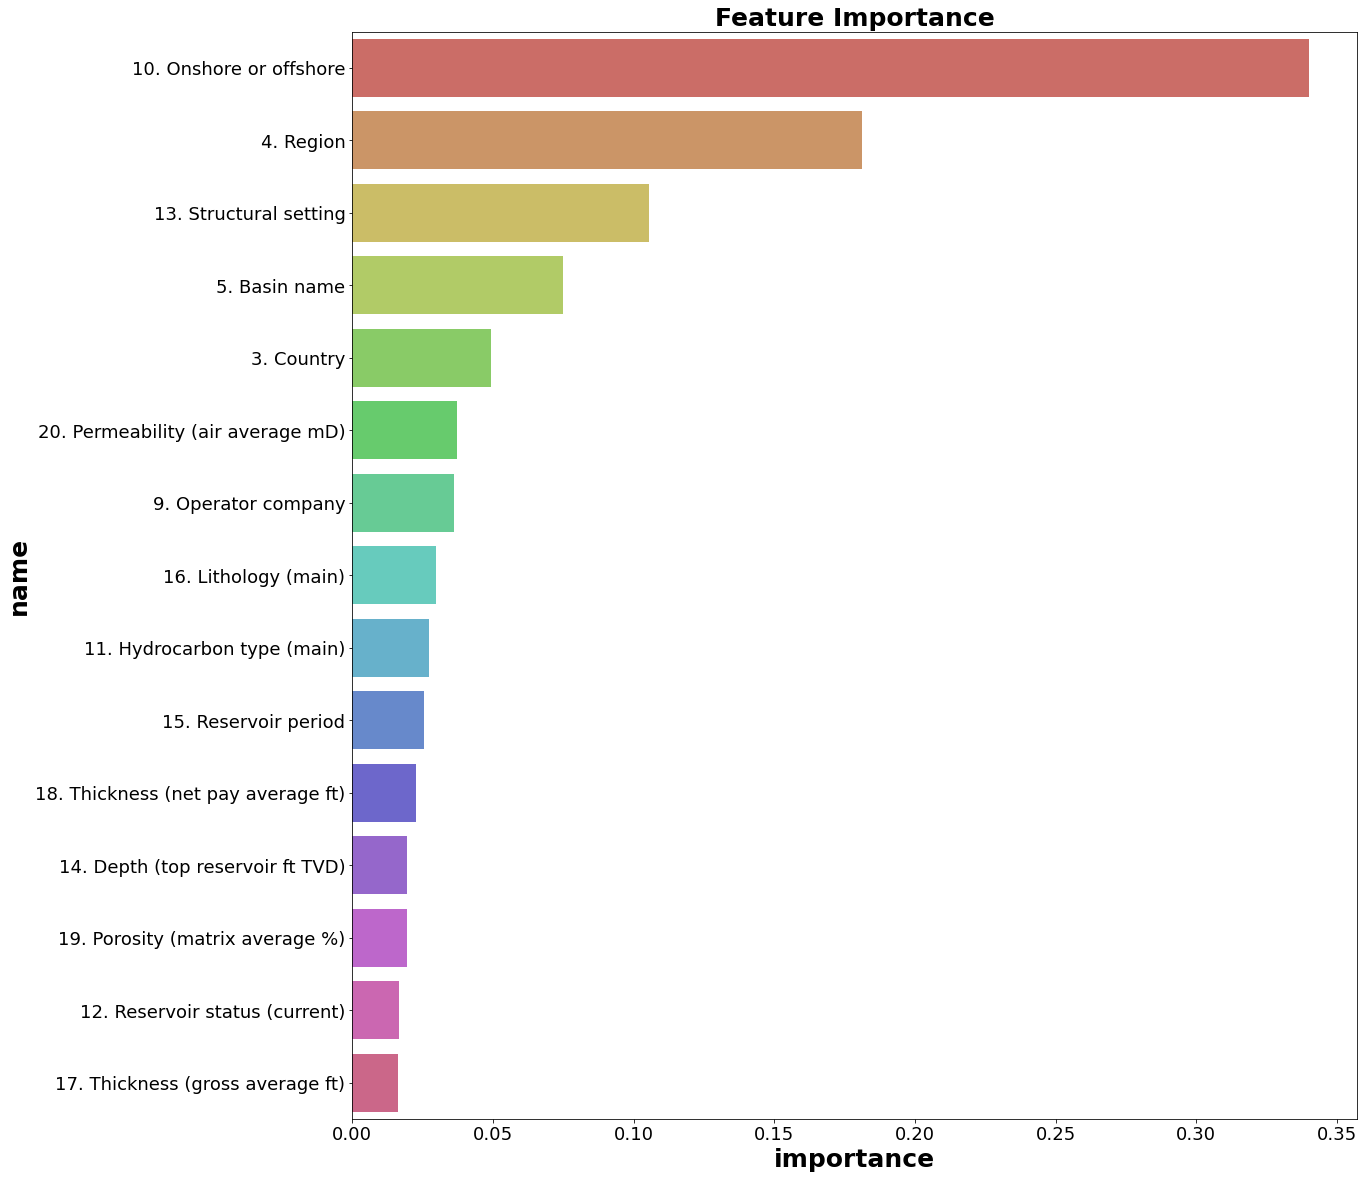

In [63]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')


In [64]:
params = {'n_estimators': [20,32,64,78],
               'max_depth': [5,12,18,20]
        }

In [65]:
grid_search = GridSearchCV(estimator = clf, param_grid = params,
                           scoring='accuracy', cv = 5, verbose=2, n_jobs = -1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.7s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                     

In [66]:
grid_search.best_score_

0.8242655935613682

In [67]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 64}

In [68]:
best_features_XGB = features['name'][:5]

In [69]:
clf_best_XGB=XGBClassifier(n_estimators=64,max_depth = 5, random_state=random_state)
clf_best_XGB.fit(x_train[best_features_XGB],y_train)
y_pred=clf_best_XGB.predict(x_test[best_features_XGB])
evaluate(y_test, y_pred)

Accuracy: 0.9101123595505618
F1: 0.910291796895766


In [70]:
cross_val_score(clf_best_XGB, x_train, y_train, cv=6)

array([0.83050847, 0.89830508, 0.86440678, 0.79661017, 0.83050847,
       0.82758621])

### CatBoost

In [71]:
clf=CatBoostClassifier(random_state=random_state)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
evaluate(y_test, y_pred)

Learning rate set to 0.075034
0:	learn: 2.0911360	total: 61.1ms	remaining: 1m 1s
1:	learn: 1.9330787	total: 62ms	remaining: 31s
2:	learn: 1.8327241	total: 65.7ms	remaining: 21.8s
3:	learn: 1.7651263	total: 69.2ms	remaining: 17.2s
4:	learn: 1.6757191	total: 70.4ms	remaining: 14s
5:	learn: 1.6116792	total: 73.9ms	remaining: 12.2s
6:	learn: 1.5469289	total: 77.4ms	remaining: 11s
7:	learn: 1.4953615	total: 81.1ms	remaining: 10.1s
8:	learn: 1.4451613	total: 84.6ms	remaining: 9.32s
9:	learn: 1.4091176	total: 88.3ms	remaining: 8.74s
10:	learn: 1.3628729	total: 91.9ms	remaining: 8.26s
11:	learn: 1.3272736	total: 95.5ms	remaining: 7.86s
12:	learn: 1.2878012	total: 99.1ms	remaining: 7.52s
13:	learn: 1.2426898	total: 103ms	remaining: 7.25s
14:	learn: 1.2124841	total: 107ms	remaining: 7s
15:	learn: 1.1858744	total: 110ms	remaining: 6.78s
16:	learn: 1.1585337	total: 114ms	remaining: 6.58s
17:	learn: 1.1200872	total: 118ms	remaining: 6.41s
18:	learn: 1.1014062	total: 121ms	remaining: 6.26s
19:	learn

208:	learn: 0.1832614	total: 765ms	remaining: 2.89s
209:	learn: 0.1826385	total: 769ms	remaining: 2.89s
210:	learn: 0.1816525	total: 772ms	remaining: 2.89s
211:	learn: 0.1811310	total: 776ms	remaining: 2.88s
212:	learn: 0.1801713	total: 780ms	remaining: 2.88s
213:	learn: 0.1794752	total: 783ms	remaining: 2.88s
214:	learn: 0.1788163	total: 786ms	remaining: 2.87s
215:	learn: 0.1780125	total: 789ms	remaining: 2.86s
216:	learn: 0.1775668	total: 792ms	remaining: 2.86s
217:	learn: 0.1764740	total: 795ms	remaining: 2.85s
218:	learn: 0.1757747	total: 799ms	remaining: 2.85s
219:	learn: 0.1751187	total: 801ms	remaining: 2.84s
220:	learn: 0.1744572	total: 804ms	remaining: 2.83s
221:	learn: 0.1737514	total: 807ms	remaining: 2.83s
222:	learn: 0.1731344	total: 810ms	remaining: 2.82s
223:	learn: 0.1720822	total: 813ms	remaining: 2.82s
224:	learn: 0.1714248	total: 816ms	remaining: 2.81s
225:	learn: 0.1706191	total: 819ms	remaining: 2.81s
226:	learn: 0.1696612	total: 823ms	remaining: 2.8s
227:	learn: 0

385:	learn: 0.0975447	total: 1.33s	remaining: 2.12s
386:	learn: 0.0973163	total: 1.34s	remaining: 2.12s
387:	learn: 0.0969249	total: 1.34s	remaining: 2.12s
388:	learn: 0.0967320	total: 1.35s	remaining: 2.12s
389:	learn: 0.0964648	total: 1.35s	remaining: 2.11s
390:	learn: 0.0960543	total: 1.35s	remaining: 2.11s
391:	learn: 0.0957457	total: 1.36s	remaining: 2.11s
392:	learn: 0.0955289	total: 1.36s	remaining: 2.11s
393:	learn: 0.0952107	total: 1.37s	remaining: 2.1s
394:	learn: 0.0948940	total: 1.37s	remaining: 2.1s
395:	learn: 0.0946676	total: 1.37s	remaining: 2.1s
396:	learn: 0.0944047	total: 1.38s	remaining: 2.09s
397:	learn: 0.0941042	total: 1.38s	remaining: 2.09s
398:	learn: 0.0939044	total: 1.38s	remaining: 2.08s
399:	learn: 0.0933978	total: 1.39s	remaining: 2.08s
400:	learn: 0.0931532	total: 1.39s	remaining: 2.08s
401:	learn: 0.0929297	total: 1.39s	remaining: 2.07s
402:	learn: 0.0927299	total: 1.4s	remaining: 2.07s
403:	learn: 0.0925789	total: 1.4s	remaining: 2.06s
404:	learn: 0.092

558:	learn: 0.0615724	total: 1.9s	remaining: 1.5s
559:	learn: 0.0614439	total: 1.9s	remaining: 1.5s
560:	learn: 0.0613416	total: 1.91s	remaining: 1.49s
561:	learn: 0.0611050	total: 1.91s	remaining: 1.49s
562:	learn: 0.0609297	total: 1.91s	remaining: 1.49s
563:	learn: 0.0608024	total: 1.92s	remaining: 1.48s
564:	learn: 0.0607260	total: 1.92s	remaining: 1.48s
565:	learn: 0.0606155	total: 1.92s	remaining: 1.48s
566:	learn: 0.0605568	total: 1.93s	remaining: 1.47s
567:	learn: 0.0604152	total: 1.93s	remaining: 1.47s
568:	learn: 0.0601111	total: 1.93s	remaining: 1.46s
569:	learn: 0.0599257	total: 1.94s	remaining: 1.46s
570:	learn: 0.0597865	total: 1.94s	remaining: 1.46s
571:	learn: 0.0596528	total: 1.94s	remaining: 1.45s
572:	learn: 0.0596042	total: 1.95s	remaining: 1.45s
573:	learn: 0.0593883	total: 1.95s	remaining: 1.45s
574:	learn: 0.0592219	total: 1.95s	remaining: 1.44s
575:	learn: 0.0591003	total: 1.96s	remaining: 1.44s
576:	learn: 0.0589111	total: 1.96s	remaining: 1.44s
577:	learn: 0.05

729:	learn: 0.0437683	total: 2.46s	remaining: 911ms
730:	learn: 0.0436716	total: 2.47s	remaining: 908ms
731:	learn: 0.0435737	total: 2.47s	remaining: 905ms
732:	learn: 0.0435216	total: 2.47s	remaining: 901ms
733:	learn: 0.0434397	total: 2.48s	remaining: 898ms
734:	learn: 0.0433993	total: 2.48s	remaining: 895ms
735:	learn: 0.0432477	total: 2.48s	remaining: 891ms
736:	learn: 0.0432123	total: 2.49s	remaining: 888ms
737:	learn: 0.0431219	total: 2.49s	remaining: 885ms
738:	learn: 0.0430142	total: 2.49s	remaining: 881ms
739:	learn: 0.0429429	total: 2.5s	remaining: 878ms
740:	learn: 0.0428350	total: 2.5s	remaining: 874ms
741:	learn: 0.0427908	total: 2.5s	remaining: 871ms
742:	learn: 0.0427541	total: 2.51s	remaining: 867ms
743:	learn: 0.0426343	total: 2.51s	remaining: 864ms
744:	learn: 0.0425395	total: 2.51s	remaining: 861ms
745:	learn: 0.0424467	total: 2.52s	remaining: 857ms
746:	learn: 0.0423760	total: 2.52s	remaining: 854ms
747:	learn: 0.0423366	total: 2.52s	remaining: 850ms
748:	learn: 0.0

903:	learn: 0.0332724	total: 3.03s	remaining: 322ms
904:	learn: 0.0332394	total: 3.04s	remaining: 319ms
905:	learn: 0.0332210	total: 3.04s	remaining: 315ms
906:	learn: 0.0331701	total: 3.04s	remaining: 312ms
907:	learn: 0.0331428	total: 3.05s	remaining: 309ms
908:	learn: 0.0330972	total: 3.05s	remaining: 305ms
909:	learn: 0.0330499	total: 3.05s	remaining: 302ms
910:	learn: 0.0330182	total: 3.06s	remaining: 299ms
911:	learn: 0.0329602	total: 3.06s	remaining: 295ms
912:	learn: 0.0329103	total: 3.06s	remaining: 292ms
913:	learn: 0.0328573	total: 3.06s	remaining: 288ms
914:	learn: 0.0328231	total: 3.07s	remaining: 285ms
915:	learn: 0.0327798	total: 3.07s	remaining: 282ms
916:	learn: 0.0327170	total: 3.08s	remaining: 278ms
917:	learn: 0.0326852	total: 3.08s	remaining: 275ms
918:	learn: 0.0326075	total: 3.08s	remaining: 272ms
919:	learn: 0.0325721	total: 3.08s	remaining: 268ms
920:	learn: 0.0325114	total: 3.09s	remaining: 265ms
921:	learn: 0.0324709	total: 3.09s	remaining: 262ms
922:	learn: 

In [72]:
features=pd.DataFrame({'importance': clf.feature_importances_},
                      index=x_train.columns).sort_values(by='importance',
                                                         ascending=False).reset_index()
features.columns = ['name', 'importance']
features

,name,importance
0,13. Structural setting,21.955076
1,10. Onshore or offshore,12.395499
2,4. Region,11.469034
3,5. Basin name,11.007539
4,3. Country,7.207260
5,14. Depth (top reservoir ft TVD),6.225114
6,9. Operator company,5.559294
7,20. Permeability (air average mD),4.891537
8,19. Porosity (matrix average %),4.881013
9,17. Thickness (gross average ft),3.208950


Text(0.5, 1.0, 'Feature Importance')

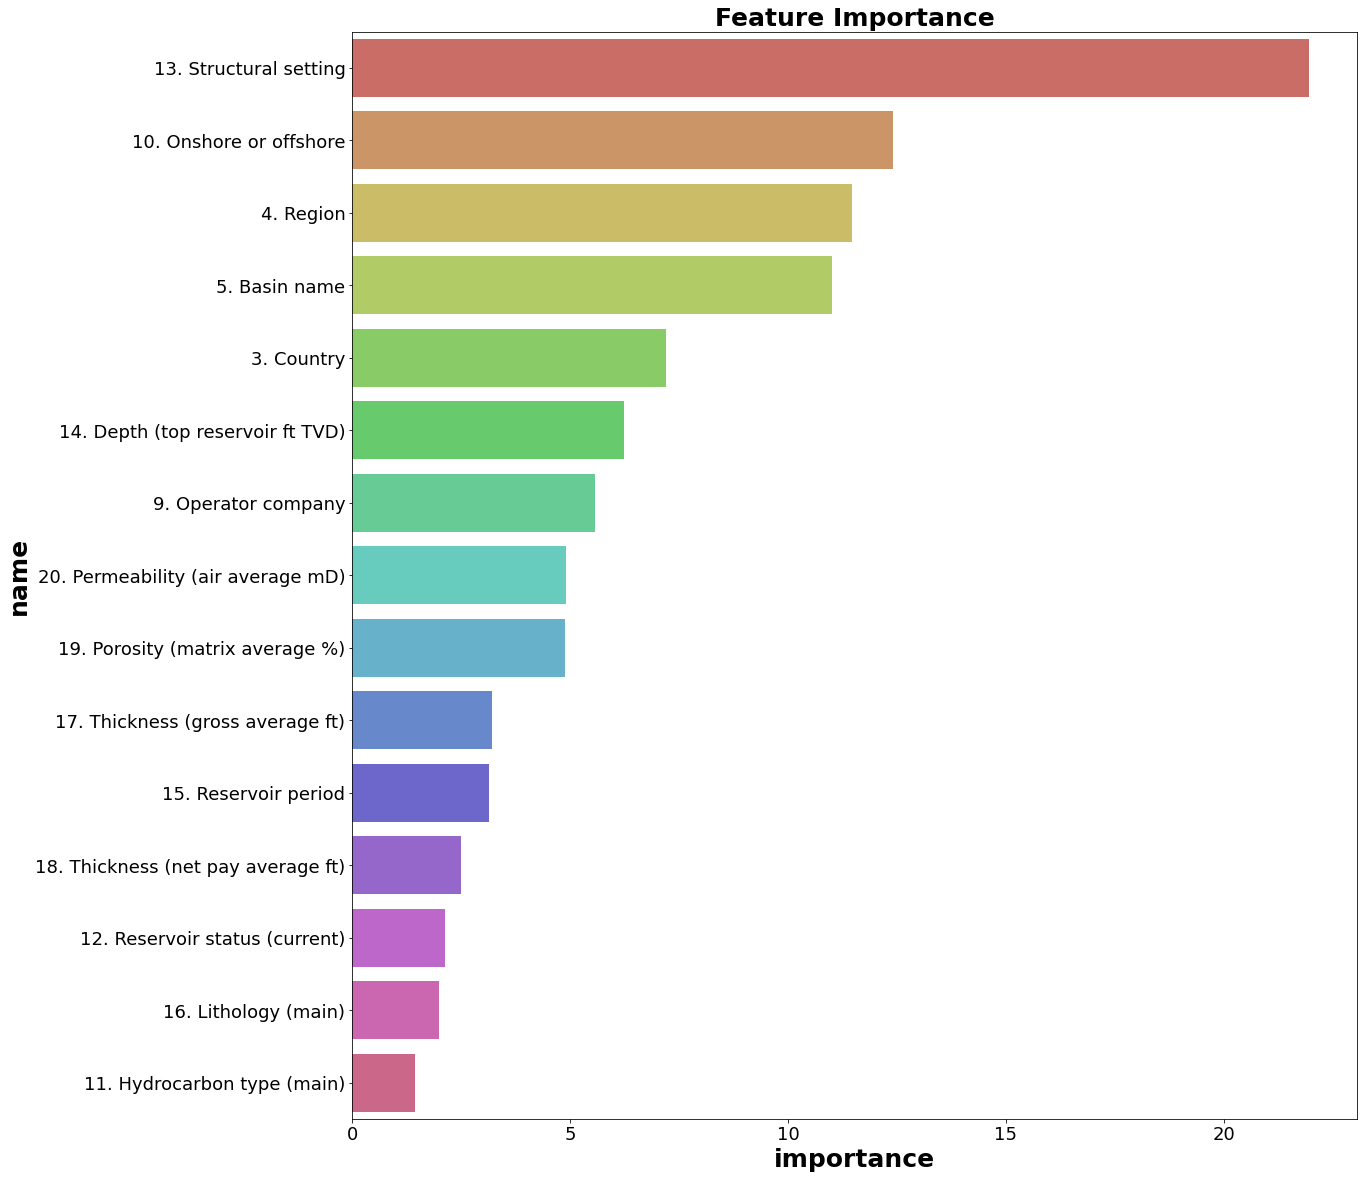

In [73]:
sns.barplot(x=features['importance'], y=features['name'], data=features, palette = 'hls')
plt.xlabel('importance', fontsize=25, weight = 'bold')
plt.ylabel('name', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [74]:
best_features_CatBoost = features['name'][:5]

In [75]:
clf_best_CatBoost=CatBoostClassifier(n_estimators=78,max_depth = 5, random_state=random_state)
clf_best_CatBoost.fit(x_train[best_features_CatBoost],y_train)
y_pred=clf_best_CatBoost.predict(x_test[best_features_CatBoost])
evaluate(y_test, y_pred)

Learning rate set to 0.5
0:	learn: 1.3002960	total: 1.52ms	remaining: 117ms
1:	learn: 1.0814410	total: 3.08ms	remaining: 117ms
2:	learn: 0.9197346	total: 4.39ms	remaining: 110ms
3:	learn: 0.8067033	total: 6.07ms	remaining: 112ms
4:	learn: 0.7184248	total: 7.48ms	remaining: 109ms
5:	learn: 0.6750985	total: 8.45ms	remaining: 101ms
6:	learn: 0.6297300	total: 10ms	remaining: 102ms
7:	learn: 0.5924170	total: 11.3ms	remaining: 98.9ms
8:	learn: 0.5494921	total: 12.6ms	remaining: 96.7ms
9:	learn: 0.5206470	total: 14.1ms	remaining: 95.7ms
10:	learn: 0.4923488	total: 15.6ms	remaining: 95ms
11:	learn: 0.4611925	total: 17ms	remaining: 93.3ms
12:	learn: 0.4451509	total: 18.5ms	remaining: 92.6ms
13:	learn: 0.4304362	total: 19.9ms	remaining: 91ms
14:	learn: 0.4196370	total: 21.1ms	remaining: 88.8ms
15:	learn: 0.4040871	total: 22.6ms	remaining: 87.5ms
16:	learn: 0.3742940	total: 24.1ms	remaining: 86.6ms
17:	learn: 0.3527684	total: 26.4ms	remaining: 88ms
18:	learn: 0.3424246	total: 28.3ms	remaining: 88

## Models for predicting missing Porosity

In [76]:
y_train = train['19. Porosity (matrix average %)']
x_train = train.drop(['6. Tectonic regime','19. Porosity (matrix average %)'], axis = 1)
y_test = test['19. Porosity (matrix average %)']
x_test = test.drop(['6. Tectonic regime','19. Porosity (matrix average %)'], axis = 1)

In [77]:
random_state=43

In [78]:
clf_RF=RandomForestRegressor(n_estimators=78, max_depth =12, random_state=random_state)
clf_RF.fit(x_train,y_train)
y_pred=clf_RF.predict(x_test)
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4.878216164900735


In [79]:
clf_GB=GradientBoostingRegressor(n_estimators=64, random_state=random_state)
clf_GB.fit(x_train,y_train)
y_pred=clf_GB.predict(x_test)
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 5.3181087620523675


In [80]:
clf_ET=ExtraTreesRegressor(n_estimators=78, max_depth =12, random_state=random_state)
clf_ET.fit(x_train,y_train)
y_pred=clf_ET.predict(x_test)
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 4.252056455194158


In [81]:
clf=AdaBoostRegressor(n_estimators=54,random_state=random_state)
clf.fit(x_train[['4. Region',
       '10. Onshore or offshore', '11. Hydrocarbon type (main)','13. Structural setting',
       '14. Depth (top reservoir ft TVD)','16. Lithology (main)',
       '20. Permeability (air average mD)']],y_train)
y_pred=clf.predict(x_test[['4. Region',
       '10. Onshore or offshore', '11. Hydrocarbon type (main)','13. Structural setting',
       '14. Depth (top reservoir ft TVD)','16. Lithology (main)',
       '20. Permeability (air average mD)']])
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 5.1466680244520315


In [82]:
scaler = MinMaxScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [83]:
clf=Ridge(alpha=1.0)
clf.fit(x_train[['4. Region',
       '10. Onshore or offshore', '11. Hydrocarbon type (main)','13. Structural setting',
       '14. Depth (top reservoir ft TVD)','16. Lithology (main)',
       '20. Permeability (air average mD)']],y_train)
y_pred=clf.predict(x_test[['4. Region',
       '10. Onshore or offshore', '11. Hydrocarbon type (main)','13. Structural setting',
       '14. Depth (top reservoir ft TVD)','16. Lithology (main)',
       '20. Permeability (air average mD)']])
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 5.217195111690677


In [84]:
clf_XGB=XGBRegressor(n_estimators=64,max_depth = 5,random_state=random_state)
clf_XGB.fit(x_train,y_train)
y_pred=clf_XGB.predict(x_test)
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 5.770817489689011


In [85]:
clf_CatBoost=CatBoostRegressor(iterations=23,learning_rate=0.4,depth=15,random_state=random_state)
clf_CatBoost.fit(x_train,y_train)
y_pred=clf_CatBoost.predict(x_test)
print('RMSE:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0:	learn: 6.6055935	total: 703ms	remaining: 15.5s
1:	learn: 5.8059091	total: 1.09s	remaining: 11.4s
2:	learn: 5.0787679	total: 1.15s	remaining: 7.65s
3:	learn: 4.4900110	total: 1.22s	remaining: 5.78s
4:	learn: 4.0064186	total: 1.5s	remaining: 5.41s
5:	learn: 3.6164396	total: 1.81s	remaining: 5.13s
6:	learn: 3.2702071	total: 2.12s	remaining: 4.84s
7:	learn: 2.9296512	total: 2.42s	remaining: 4.54s
8:	learn: 2.6396080	total: 2.73s	remaining: 4.25s
9:	learn: 2.3875306	total: 3.03s	remaining: 3.94s
10:	learn: 2.1462279	total: 3.19s	remaining: 3.48s
11:	learn: 1.9288770	total: 3.48s	remaining: 3.19s
12:	learn: 1.7539874	total: 3.79s	remaining: 2.91s
13:	learn: 1.5930776	total: 4.1s	remaining: 2.64s
14:	learn: 1.4431863	total: 4.41s	remaining: 2.35s
15:	learn: 1.3058136	total: 4.72s	remaining: 2.07s
16:	learn: 1.1796755	total: 5.04s	remaining: 1.78s
17:	learn: 1.0611239	total: 5.34s	remaining: 1.48s
18:	learn: 0.9580555	total: 5.65s	remaining: 1.19s
19:	learn: 0.8786997	total: 5.97s	remaining

## Training tuned models on all data and prediction of gaps

In [86]:
df = dataset.drop(['1. Field name','2. Reservoir unit','7. Latitude', '8. Longitude'], axis=1)

dict for LabelEncoder

In [87]:
d = defaultdict(LabelEncoder)

In [88]:
df[cat_parameters] = df[cat_parameters].apply(lambda x: d[x.name].fit_transform(x.astype(str)))


In [89]:
df1 = df.dropna()#dataset without blanks
df2 = df[df['N'].isin(df_na['N'])].reset_index()#dataset with blanks

In [90]:
dataset2=dataset[dataset['N'].isin(df_na['N'])].reset_index()#to merge in the end with result

In [91]:
df3=df2.drop(['N','index'], axis=1)
df1=df1.drop(['N'], axis=1)
train = df1
test = df3
print(train.shape)
print(test.shape)

(442, 16)
(72, 16)


In [92]:
y_train = train['6. Tectonic regime']
x_train = train.drop(['6. Tectonic regime'], axis = 1)
x_test = test.drop(['6. Tectonic regime'], axis = 1)

In [93]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

### Tectonic regime

In [94]:
clf_best_RandomForest.fit(x_train[best_features_RandomForest], y_train)
y_pred=clf_best_RandomForest.predict(x_test[best_features_RandomForest])

In [95]:
clf_best_RandomForest.fit(x_train[best_features_RandomForest], y_train)
y_pred=clf_best_RandomForest.predict(x_test[best_features_RandomForest])
result_transformed = d['6. Tectonic regime'].inverse_transform(y_pred)
result_transformed = pd.DataFrame(data=result_transformed, columns=['6. Tectonic regime'])
result = pd.merge(dataset2.drop(['6. Tectonic regime'],axis=1),result_transformed, left_index = True, right_index = True)
resultRandomForest = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultRandomForest

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


In [96]:
clf_best_GradientBoosting.fit(x_train[best_features_GradientBoosting], y_train)
y_pred=clf_best_GradientBoosting.predict(x_test[best_features_GradientBoosting])
result_transformed = d['6. Tectonic regime'].inverse_transform(y_pred)
result_transformed = pd.DataFrame(data=result_transformed, columns=['6. Tectonic regime'])
result = pd.merge(dataset2.drop(['6. Tectonic regime'],axis=1),result_transformed, left_index = True, right_index = True)
resultGradientBoosting = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultGradientBoosting

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


In [97]:
clf_best_ExtraTrees.fit(x_train[best_features_ExtraTrees], y_train)
y_pred=clf_best_ExtraTrees.predict(x_test[best_features_ExtraTrees])
result_transformed = d['6. Tectonic regime'].inverse_transform(y_pred)
result_transformed = pd.DataFrame(data=result_transformed, columns=['6. Tectonic regime'])
result = pd.merge(dataset2.drop(['6. Tectonic regime'],axis=1),result_transformed, left_index = True, right_index = True)
resultExtraTrees = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultExtraTrees

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


In [98]:
clf_best_XGB.fit(x_train[best_features_XGB], y_train)
y_pred=clf_best_XGB.predict(x_test[best_features_XGB])
result_transformed = d['6. Tectonic regime'].inverse_transform(y_pred)
result_transformed = pd.DataFrame(data=result_transformed, columns=['6. Tectonic regime'])
result = pd.merge(dataset2.drop(['6. Tectonic regime'],axis=1),result_transformed, left_index = True, right_index = True)
resultXGB = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultXGB

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


In [99]:
clf_best_CatBoost.fit(x_train[best_features_CatBoost], y_train)
y_pred=clf_best_CatBoost.predict(x_test[best_features_CatBoost])
result_transformed = d['6. Tectonic regime'].inverse_transform(y_pred)
result_transformed = pd.DataFrame(data=result_transformed, columns=['6. Tectonic regime'])
result = pd.merge(dataset2.drop(['6. Tectonic regime'],axis=1),result_transformed, left_index = True, right_index = True)
resultCatBoost = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultCatBoost

Learning rate set to 0.5
0:	learn: 1.2903523	total: 1.97ms	remaining: 152ms
1:	learn: 1.0920217	total: 3.68ms	remaining: 140ms
2:	learn: 0.9377350	total: 5.36ms	remaining: 134ms
3:	learn: 0.8098840	total: 7.05ms	remaining: 130ms
4:	learn: 0.7438275	total: 8.67ms	remaining: 127ms
5:	learn: 0.7034469	total: 9.99ms	remaining: 120ms
6:	learn: 0.6599364	total: 11.7ms	remaining: 119ms
7:	learn: 0.6054450	total: 13.5ms	remaining: 118ms
8:	learn: 0.5706376	total: 15.2ms	remaining: 117ms
9:	learn: 0.5406935	total: 16.9ms	remaining: 115ms
10:	learn: 0.5205770	total: 18.6ms	remaining: 113ms
11:	learn: 0.4933330	total: 20.2ms	remaining: 111ms
12:	learn: 0.4786728	total: 21.9ms	remaining: 109ms
13:	learn: 0.4457306	total: 23.7ms	remaining: 108ms
14:	learn: 0.4257553	total: 25.3ms	remaining: 106ms
15:	learn: 0.4037180	total: 27.1ms	remaining: 105ms
16:	learn: 0.3842767	total: 29.1ms	remaining: 105ms
17:	learn: 0.3702545	total: 30.9ms	remaining: 103ms
18:	learn: 0.3609609	total: 32.4ms	remaining: 101

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,NaN,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,NaN,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,NaN,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,NaN,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,NaN,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,NaN,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,NaN,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,NaN,126.0


### Porosity

In [100]:
y_train = train['19. Porosity (matrix average %)']
x_train = train.drop(['6. Tectonic regime','19. Porosity (matrix average %)'], axis = 1)
x_test = test.drop(['6. Tectonic regime','19. Porosity (matrix average %)'], axis = 1)

In [101]:
scaler = MinMaxScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [102]:
clf_RF.fit(x_train,y_train)
y_pred=clf_RF.predict(x_test)
y_pred=np.round(y_pred,2)
Ypred = pd.DataFrame(data=y_pred, columns=['19. Porosity (matrix average %)'])
result = pd.merge(resultRandomForest.drop(['19. Porosity (matrix average %)'],axis=1),Ypred, left_index = True, right_index = True)
resultRandomForest = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultRandomForest

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,25.31,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,10.66,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,18.59,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,18.70,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,21.06,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,14.42,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,11.06,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,18.97,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,19.32,126.0


In [103]:
clf_GB.fit(x_train,y_train)
y_pred=clf_GB.predict(x_test)
y_pred=np.round(y_pred,2)
Ypred = pd.DataFrame(data=y_pred, columns=['19. Porosity (matrix average %)'])
result = pd.merge(resultGradientBoosting.drop(['19. Porosity (matrix average %)'],axis=1),Ypred, left_index = True, right_index = True)
resultGradientBoosting = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultGradientBoosting

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,25.90,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,12.34,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,14.98,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,21.64,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,16.84,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,12.73,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,10.25,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,29.30,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,18.19,126.0


In [104]:
clf_ET.fit(x_train,y_train)
y_pred=clf_ET.predict(x_test)
y_pred=np.round(y_pred,2)
Ypred = pd.DataFrame(data=y_pred, columns=['19. Porosity (matrix average %)'])
result = pd.merge(resultExtraTrees.drop(['19. Porosity (matrix average %)'],axis=1),Ypred, left_index = True, right_index = True)
resultExtraTrees = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultExtraTrees

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,25.08,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,11.27,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,16.75,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,22.43,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,18.34,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,13.25,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,11.81,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,23.91,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,21.01,126.0


In [105]:
clf_XGB.fit(x_train,y_train)
y_pred=clf_XGB.predict(x_test)
y_pred=np.round(y_pred,2)
Ypred = pd.DataFrame(data=y_pred, columns=['19. Porosity (matrix average %)'])
result = pd.merge(resultXGB.drop(['19. Porosity (matrix average %)'],axis=1),Ypred, left_index = True, right_index = True)
resultXGB = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultXGB

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,26.780001,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,13.240000,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,18.580000,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,17.120001,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,20.410000,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,12.400000,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,8.340000,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,23.709999,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,19.730000,126.0


In [106]:
clf_CatBoost.fit(x_train,y_train)
y_pred=clf_CatBoost.predict(x_test)
y_pred=np.round(y_pred,2)
Ypred = pd.DataFrame(data=y_pred, columns=['19. Porosity (matrix average %)'])
result = pd.merge(resultCatBoost.drop(['19. Porosity (matrix average %)'],axis=1),Ypred, left_index = True, right_index = True)
resultCatBoost = result[['N', '3. Country', '4. Region', '5. Basin name', '6. Tectonic regime',
       '9. Operator company', '10. Onshore or offshore',
       '11. Hydrocarbon type (main)', '12. Reservoir status (current)',
       '13. Structural setting', '14. Depth (top reservoir ft TVD)',
       '15. Reservoir period', '16. Lithology (main)',
       '17. Thickness (gross average ft)',
       '18. Thickness (net pay average ft)', '19. Porosity (matrix average %)',
       '20. Permeability (air average mD)']]
resultCatBoost

0:	learn: 6.5285106	total: 312ms	remaining: 6.87s
1:	learn: 5.7691904	total: 638ms	remaining: 6.7s
2:	learn: 5.0364312	total: 959ms	remaining: 6.39s
3:	learn: 4.4880401	total: 1.28s	remaining: 6.11s
4:	learn: 3.9905965	total: 1.31s	remaining: 4.73s
5:	learn: 3.5667942	total: 1.62s	remaining: 4.58s
6:	learn: 3.2100912	total: 1.94s	remaining: 4.44s
7:	learn: 2.9255466	total: 2s	remaining: 3.75s
8:	learn: 2.6626292	total: 2.04s	remaining: 3.17s
9:	learn: 2.3994303	total: 2.34s	remaining: 3.04s
10:	learn: 2.1654077	total: 2.67s	remaining: 2.91s
11:	learn: 1.9946544	total: 3s	remaining: 2.75s
12:	learn: 1.7988025	total: 3.33s	remaining: 2.56s
13:	learn: 1.6337776	total: 3.66s	remaining: 2.35s
14:	learn: 1.5002294	total: 3.99s	remaining: 2.13s
15:	learn: 1.3662733	total: 4.32s	remaining: 1.89s
16:	learn: 1.2850811	total: 4.35s	remaining: 1.53s
17:	learn: 1.1728928	total: 4.66s	remaining: 1.29s
18:	learn: 1.0739707	total: 4.98s	remaining: 1.05s
19:	learn: 0.9874911	total: 5.14s	remaining: 771

,N,3. Country,4. Region,5. Basin name,6. Tectonic regime,9. Operator company,10. Onshore or offshore,11. Hydrocarbon type (main),12. Reservoir status (current),13. Structural setting,14. Depth (top reservoir ft TVD),15. Reservoir period,16. Lithology (main),17. Thickness (gross average ft),18. Thickness (net pay average ft),19. Porosity (matrix average %),20. Permeability (air average mD)
0,22,UK,EUROPE,NORTH SEA CENTRAL,EXTENSION,CHEVRON,OFFSHORE,OIL,DECLINING PRODUCTION,RIFT,5642,PALEOGENE,THINLY-BEDDED SANDSTONE,300.0,270.0,22.60,3500.0
1,25,USA,NORTH AMERICA,MICHIGAN,STRIKE-SLIP,NUMEROUS,ONSHORE,OIL,NEARLY DEPLETED,INTRACRATONIC,3800,ORDOVICIAN,DOLOMITE,600.0,400.0,15.62,10.0
2,54,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,BASHNEFT,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,2760,CARBONIFEROUS,DOLOMITIC LIMESTONE,141.0,26.0,19.76,24.0
3,61,USA,NORTH AMERICA,GULF OF MEXICO NORTHERN OFFSHORE,GRAVITY,SHELL,OFFSHORE,OIL,DECLINING PRODUCTION,DELTA,15840,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,170.0,18.10,150.0
4,67,BAHRAIN,MIDDLE EAST,THE GULF,COMPRESSION,BAHRAIN NATIONAL OIL CO,ONSHORE,OIL,DECLINING PRODUCTION,SALT,2233,CRETACEOUS,LIMESTONE,110.0,110.0,16.74,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1033,CHINA,FAR EAST,TARIM,COMPRESSION,SINOPEC,ONSHORE,GAS-CONDENSATE,DEVELOPING,THRUST,17132,CRETACEOUS,SANDSTONE,161.0,82.0,16.04,90.0
68,1047,USA,NORTH AMERICA,PERMIAN,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,8315,PERMIAN,SHALY SANDSTONE,140.0,35.0,12.59,1.0
69,1053,UAE,MIDDLE EAST,RUB AL KHALI,GRAVITY,ADMA /ZADCO,OFFSHORE,OIL,PLATEAU PRODUCTION,SALT,6420,CRETACEOUS,LIMESTONE,121.0,50.0,21.22,1.5
70,1059,CHINA,FAR EAST,BOHAI,EXTENSION,PETROCHINA,ONSHORE,OIL,PLATEAU PRODUCTION,RIFT,5545,PALEOGENE,SANDSTONE,689.0,192.0,16.44,126.0


### Get excel files with results

In [107]:
resultRandomForest.to_excel('resultRandomForest.xlsx')
resultGradientBoosting.to_excel('resultGradientBoosting.xlsx')
resultExtraTrees.to_excel('resultExtraTrees.xlsx')
resultXGB.to_excel('resultXGB.xlsx')
resultCatBoost.to_excel('resultCatBoost.xlsx')